### import libraries

In [1]:
import os
import glob
import nltk
from nltk import word_tokenize
import re
import json
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load dataset

In [2]:
import os

def load_data(folder_path):
    all_lines = []
    count=0
    
    for filename in os.listdir(folder_path):
        count+=1
        print(f"{count}, {filename}" )
        if filename.endswith(".txt"):
            filepath = os.path.join(folder_path, filename)
            
            with open(filepath, 'r', encoding='utf-8') as file:
                for line in file:
                    all_lines.append(line.strip())
                    
    return all_lines

folder_path = "C:/Users/user/Desktop/Files/University/NLP/A2/dataset"
data = load_data(folder_path)

# print(data[:5])

1, 100_Day11.txt
2, 104_Day11.txt
3, 125_Day1.txt
4, 125_Day14.txt
5, 135_Day11.txt
6, 158_Day3.txt
7, 158_Day7.txt
8, 158_Day8.txt
9, 164_Day11.txt
10, 165_Day14.txt
11, 165_Day8.txt
12, 173_Day2.txt
13, 188_Day8.txt
14, 191_Day13.txt
15, 191_Day4.txt
16, 197_Day4.txt
17, 199_Day5.txt
18, 200_Day7.txt
19, 201_Day8.txt
20, 208_Day3.txt
21, 211_Day8.txt
22, 213_Day4.txt
23, 214_Day12.txt
24, 223_Day14.txt
25, 223_Day8.txt
26, 224_Day14.txt
27, 224_Day3.txt
28, 225_Day2.txt
29, 228_Day1.txt
30, 229_Day7.txt
31, 230_Day11.txt
32, 240_Day10.txt
33, 245_Day1.txt
34, 245_Day8.txt
35, 250_Day5.txt
36, 250_Day9.txt
37, 257_Day12.txt
38, 257_Day4.txt
39, 274_Day2.txt
40, 280_Day13.txt
41, 285_Day4.txt
42, 285_Day7.txt
43, 290_Day4.txt
44, 291_Day1.txt
45, 304_Day9.txt
46, 311_Day5.txt
47, 311_Day6.txt
48, 331_Day10.txt
49, 336_Day12.txt
50, 337_Day3.txt
51, 343_Day13.txt
52, 344_Day13.txt
53, 350_Day7.txt
54, 356_Day9.txt
55, 360_Day7.txt
56, 360_Day9.txt
57, 363_Day13.txt
58, 366_Day4.txt
59, 

In [3]:
len(data)

1006

### Data preprocessing

In [4]:
def preprocess_text(text):
    
    #convert to lowercase
    text = text.lower()

    #remove unnecessary punctuation
    text = re.sub(r'[^\w\s]', '', text)

    #remove extra spaces and tabs
    text = re.sub(r'\s+', ' ', text).strip()
    
    #remove numbering at start
    text = re.sub(r'^\d+\s*', '', text)
    
    #remove extra line breaks
    text = re.sub(r'\n+', ' ', text).strip()

    return text

In [5]:
new_data= [preprocess_text(line) for line in data]

In [18]:
for i in new_data:
    print(i,'\n')

subha 5 bjhey uthna perha trip thaa jaldi jaldi ready hua aur 0540 ghar saay nikal gaay 

0615 bus chal perhee joo kaay first time thaa kaay trip time saay chala 

nust kaay 3 larkay thy unsaay batain kee phir bluetooth trip coordinator kaay pass thaa tou humm shoor daltay rahay kaay song change krr dain 

phir murree mein nashtay kaay leya uthay phir usskay baad bluetooth humain mil gaya 

mein tou soogaya phir hum jaga prr phouch gaay udhar 3 peaks theen 2 perr char gaay 

aik prr sahi ghalat raastay saay gaay thy full steep thaa mujhey tou laga mein gaya 

peak prr pohouch gaya phir picks leen 

phir slow wala group bhee aa gaya thaa unn kaay sath dubara picks leen 

wapsi prr jeep mein bohot rash thaa 

phir dinner keya ghar gaay aur soogaau 

subah 8 bjy utha fresh hua nashta kiya aur university k liye tyaar honay laga 

9 bjy apne bike pe university k liye nikal gaya aj friday ha aur aj mere sirf 2 classes huti hain 

university ponch k classes li pehla lecture nlp ka tha jis me 

In [6]:
def load_normalization_dict(filename):
    try:
        with open(filename, "r", encoding="utf-8") as file:
            raw_dict = json.load(file)
        
        # Convert all keys and values to lowercase
        processed_dict = {}
        for key, value in raw_dict.items():
            key_lower = key.lower()
            value_lower = value.lower()
            if key_lower not in processed_dict:
                processed_dict[key_lower] = value_lower
        
        return processed_dict
    except json.JSONDecodeError:
        print("Error: Unable to decode JSON. Please check the file format.")
        return {}
    except FileNotFoundError:
        print("Error: File not found. Please check the file path.")
        return {}

# Load dictionary
normalization_dict = load_normalization_dict("C:/Users/user/Desktop/Files/University/NLP/A2/dict.json")

In [20]:
normalization_dict

{'mei': 'main',
 'mai': 'main',
 'main': 'main',
 'kya': 'kya',
 'kia': 'karna',
 'kiya': 'kar',
 'mujhe': 'mujhe',
 'mujhay': 'mujhe',
 'mujhy': 'mujhe',
 'uthna': 'uthna',
 'uthay': 'uthna',
 'utha': 'uthna',
 'nashta': 'nashta',
 'nashtay': 'nashta',
 'bjay': 'baje',
 'baje': 'baje',
 'nikla': 'nikalna',
 'niklay': 'nikalna',
 'niklaa': 'nikalna',
 'niklayga': 'niklega',
 'poncha': 'pohcha',
 'pohunch': 'pohcha',
 'pohanch': 'pohcha',
 'chal': 'chala',
 'chala': 'chala',
 'chalay': 'chala',
 'aya': 'aaya',
 'aaya': 'aaya',
 'aai': 'aayi',
 'gaya': 'gaya',
 'gai': 'gayi',
 'gaye': 'gaye',
 'betha': 'baitha',
 'bethay': 'baitha',
 'bethayga': 'baithayga',
 'parhna': 'parhna',
 'parhi': 'parhna',
 'parh': 'parhna',
 'parhayi': 'parhna',
 'parhay': 'parhna',
 'parhny': 'parhna',
 'acha': 'achha',
 'accha': 'achha',
 'bohot': 'bahut',
 'boht': 'bahut',
 'kaafi': 'kaafi',
 'thoda': 'thoda',
 'thori': 'thodi',
 'thoriya': 'thodi',
 'masla': 'masla',
 'maslay': 'masla',
 'masle': 'masla',
 

In [7]:
def normalize_text(sentence, normalization_dict):
    words = sentence.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return " ".join(normalized_words)

In [8]:
normalized_data = [normalize_text(sentence, normalization_dict) for sentence in new_data]

In [23]:
normalized_data

['subah 5 baje uthna para trip tha jaldi jaldi ready huwa aur 0540 ghar se nikal gaye',
 '0615 bus chala padi jo ke first time tha ke trip time se chala',
 'nust ke 3 larkay the unse baat ki phir bluetooth trip coordinator ke pass tha tou hum shor dalte rahay ke song change kar den',
 'phir murree mein nashta ke leya uthna phir uske baad bluetooth humain mil gaya',
 'mein tou so gaya phir hum jaga par pahunch gaye udhar 3 peaks thin 2 par chadh gaye',
 'ek par sahi galat raste se gaye the full steep tha mujhey tou laga mein gaya',
 'peak par pahunch gaya phir picks li',
 'phir slow wala group bhi aa gaya tha un ke sath dubara picks li',
 'wapsi par jeep mein bahut rash tha',
 'phir dinner kiya ghar gaye aur so gaya',
 'subah 8 baje uthna fresh huwa nashta kar aur university ke liye tyaar hone laga',
 '9 baje apne bike par university ke liye nikal gaya aj friday ha aur aj mere sirf 2 classes hoti hain',
 'university pahunch ke classes li pehla lecture nlp ka tha jis me bahut maza aata h

## Implementation of models

### Tokenization

In [9]:
import nltk
nltk.download('punkt_tab')

tokens= [words for sentences in normalized_data for words in nltk.tokenize.word_tokenize(sentences)]

print(len(tokens), tokens[:100])

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


16086 ['subah', '5', 'baje', 'uthna', 'para', 'trip', 'tha', 'jaldi', 'jaldi', 'ready', 'huwa', 'aur', '0540', 'ghar', 'se', 'nikal', 'gaye', '0615', 'bus', 'chala', 'padi', 'jo', 'ke', 'first', 'time', 'tha', 'ke', 'trip', 'time', 'se', 'chala', 'nust', 'ke', '3', 'larkay', 'the', 'unse', 'baat', 'ki', 'phir', 'bluetooth', 'trip', 'coordinator', 'ke', 'pass', 'tha', 'tou', 'hum', 'shor', 'dalte', 'rahay', 'ke', 'song', 'change', 'kar', 'den', 'phir', 'murree', 'mein', 'nashta', 'ke', 'leya', 'uthna', 'phir', 'uske', 'baad', 'bluetooth', 'humain', 'mil', 'gaya', 'mein', 'tou', 'so', 'gaya', 'phir', 'hum', 'jaga', 'par', 'pahunch', 'gaye', 'udhar', '3', 'peaks', 'thin', '2', 'par', 'chadh', 'gaye', 'ek', 'par', 'sahi', 'galat', 'raste', 'se', 'gaye', 'the', 'full', 'steep', 'tha', 'mujhey']


In [10]:
unique_tokens= list(set(tokens))
print(len(unique_tokens), (unique_tokens[:100]))

2361 ['dekh', 'anay', 'hamari', 'pohnch', 'bataye', '1230', 'ankhein', 'bethi', 'masjid', 'thees', 'rahein', 'bhot', 'kuc', 'bund', 'wallet', 'nai', 'duayein', 'bahr', 'aunka', 'linkedin', 'chota', '900pm', '630', 'hotfix', 'achanak', 'load', 'nashte', 'naha', 'freelance', 'safar', 'café', 'baay', 'quiz', 'hawalay', 'halkay', 'tak', 'maze', 'agai', 'ponchne', 'sogia', 'capsule', 'pas', 'paa', 'valorant', 'ghante', 'bs', 'hokay', 'khane', 'bukhar', 'duniya', 'nae', 'dataset', 'hogyi', 'minhaj', 'faida', 'gay', 'khanay', 'naye', 'parho', 'villa', '1', 'himat', 'ka', 'laita', 'baray', 'friend', 'thode', 'shana', 'cricket', 'ct', 'dental', 'khaany', 'alwaqiah', 'chaawal', 'sahi', 'visit', 'pohanchny', 'hawa', '20', 'pizzas', 'kaisa', 'ro', 'milkar', 'sone', 'maza', 'requirements', 'laaite', 'pc', 'klay', 'learning', 'hoon', 'hut', 'gobi', 'drop', 'agle', 'suba', 'hectic', 'bj', 'banao', 'nikli']


### Unigram

In [11]:
unigram={}

for words in tokens:
    if words in unigram.keys():
        unigram[words]+=1
    
    else:
        unigram[words]=1

In [31]:
unigram

{'subah': 90,
 '5': 15,
 'baje': 194,
 'uthna': 59,
 'para': 7,
 'trip': 7,
 'tha': 186,
 'jaldi': 44,
 'ready': 3,
 'huwa': 43,
 'aur': 666,
 '0540': 1,
 'ghar': 163,
 'se': 220,
 'nikal': 31,
 'gaye': 127,
 '0615': 1,
 'bus': 32,
 'chala': 78,
 'padi': 1,
 'jo': 38,
 'ke': 537,
 'first': 1,
 'time': 49,
 'nust': 1,
 '3': 16,
 'larkay': 1,
 'the': 22,
 'unse': 6,
 'baat': 30,
 'ki': 2,
 'phir': 331,
 'bluetooth': 2,
 'coordinator': 1,
 'pass': 10,
 'tou': 26,
 'hum': 59,
 'shor': 3,
 'dalte': 1,
 'rahay': 6,
 'song': 1,
 'change': 7,
 'kar': 388,
 'den': 1,
 'murree': 1,
 'mein': 181,
 'nashta': 86,
 'leya': 3,
 'uske': 45,
 'baad': 254,
 'humain': 1,
 'mil': 19,
 'gaya': 183,
 'so': 65,
 'jaga': 3,
 'par': 85,
 'pahunch': 11,
 'udhar': 5,
 'peaks': 1,
 'thin': 6,
 '2': 25,
 'chadh': 1,
 'ek': 65,
 'sahi': 18,
 'galat': 1,
 'raste': 6,
 'full': 1,
 'steep': 1,
 'mujhey': 1,
 'laga': 19,
 'peak': 1,
 'picks': 2,
 'li': 36,
 'slow': 1,
 'wala': 5,
 'group': 6,
 'bhi': 101,
 'aa': 45,
 '

In [12]:
bigram={}

for i in range(len(tokens)-1):
    
    bigram_words= (tokens[i], tokens[i+1])
    
    if bigram_words in bigram.keys():
        bigram[bigram_words]+=1
    
    else:
        bigram[bigram_words]=1

In [33]:
bigram

{('subah', '5'): 2,
 ('5', 'baje'): 10,
 ('baje', 'uthna'): 27,
 ('uthna', 'para'): 3,
 ('para', 'trip'): 1,
 ('trip', 'tha'): 1,
 ('tha', 'jaldi'): 2,
 ('jaldi', 'jaldi'): 8,
 ('jaldi', 'ready'): 1,
 ('ready', 'huwa'): 2,
 ('huwa', 'aur'): 6,
 ('aur', '0540'): 1,
 ('0540', 'ghar'): 1,
 ('ghar', 'se'): 4,
 ('se', 'nikal'): 2,
 ('nikal', 'gaye'): 8,
 ('gaye', '0615'): 1,
 ('0615', 'bus'): 1,
 ('bus', 'chala'): 1,
 ('chala', 'padi'): 1,
 ('padi', 'jo'): 1,
 ('jo', 'ke'): 6,
 ('ke', 'first'): 1,
 ('first', 'time'): 1,
 ('time', 'tha'): 2,
 ('tha', 'ke'): 6,
 ('ke', 'trip'): 1,
 ('trip', 'time'): 1,
 ('time', 'se'): 3,
 ('se', 'chala'): 1,
 ('chala', 'nust'): 1,
 ('nust', 'ke'): 1,
 ('ke', '3'): 2,
 ('3', 'larkay'): 1,
 ('larkay', 'the'): 1,
 ('the', 'unse'): 1,
 ('unse', 'baat'): 2,
 ('baat', 'ki'): 1,
 ('ki', 'phir'): 2,
 ('phir', 'bluetooth'): 1,
 ('bluetooth', 'trip'): 1,
 ('trip', 'coordinator'): 1,
 ('coordinator', 'ke'): 1,
 ('ke', 'pass'): 6,
 ('pass', 'tha'): 1,
 ('tha', 'tou'): 8

In [13]:
trigram={}

for i in range(len(tokens)-2):
    
    trigram_words= (tokens[i], tokens[i+1], tokens[i+2])
    
    if trigram_words in trigram.keys():
        trigram[trigram_words]+=1
    
    else:
        trigram[trigram_words]=1

In [36]:
trigram

{('subah', '5', 'baje'): 2,
 ('5', 'baje', 'uthna'): 2,
 ('baje', 'uthna', 'para'): 1,
 ('uthna', 'para', 'trip'): 1,
 ('para', 'trip', 'tha'): 1,
 ('trip', 'tha', 'jaldi'): 1,
 ('tha', 'jaldi', 'jaldi'): 1,
 ('jaldi', 'jaldi', 'ready'): 1,
 ('jaldi', 'ready', 'huwa'): 1,
 ('ready', 'huwa', 'aur'): 2,
 ('huwa', 'aur', '0540'): 1,
 ('aur', '0540', 'ghar'): 1,
 ('0540', 'ghar', 'se'): 1,
 ('ghar', 'se', 'nikal'): 2,
 ('se', 'nikal', 'gaye'): 1,
 ('nikal', 'gaye', '0615'): 1,
 ('gaye', '0615', 'bus'): 1,
 ('0615', 'bus', 'chala'): 1,
 ('bus', 'chala', 'padi'): 1,
 ('chala', 'padi', 'jo'): 1,
 ('padi', 'jo', 'ke'): 1,
 ('jo', 'ke', 'first'): 1,
 ('ke', 'first', 'time'): 1,
 ('first', 'time', 'tha'): 1,
 ('time', 'tha', 'ke'): 1,
 ('tha', 'ke', 'trip'): 1,
 ('ke', 'trip', 'time'): 1,
 ('trip', 'time', 'se'): 1,
 ('time', 'se', 'chala'): 1,
 ('se', 'chala', 'nust'): 1,
 ('chala', 'nust', 'ke'): 1,
 ('nust', 'ke', '3'): 1,
 ('ke', '3', 'larkay'): 1,
 ('3', 'larkay', 'the'): 1,
 ('larkay', 'th

## **1. Unigram Model probability** 

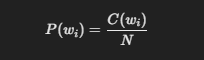

## **1. Bigram Model Probability**

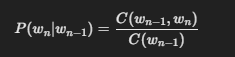

---

## **2. Trigram Model Probability**

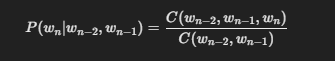

In [20]:
def next_word_prediction_unigram(input_tokens, unigram, vocabulary, words_to_generate=100):
    unigram_probabilities={}
    
    for _ in range(words_to_generate):
        for word in vocabulary:
            uniprob= (unigram.get(word, 0)+1)/(len(tokens)+len(vocabulary)) #formula with laplace smoothing
            unigram_probabilities[word]= uniprob

        uni_probabilities = sorted(unigram_probabilities.items(), key=lambda x: x[1], reverse=True) #sorted the probabilities

        top_unigram = uni_probabilities[0]
        next_token= top_unigram[0] #next token in the sentence
        
        input_tokens=input_tokens+" "+next_token
        
    return input_tokens

next_word_prediction_unigram("main subah uth kar university gaya", unigram, unique_tokens)

'main subah uth kar university gaya aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur aur'

In [45]:
def next_word_prediction_bigram(input_tokens, bigram, vocabulary, unigram, words_to_generate=100):
    sentence = input_tokens  # Start sentence
    input_tokens = tuple(input_tokens.split())
    print(input_tokens[-1])

    for _ in range(words_to_generate):
        bigram_probabilities = {}

        for word in vocabulary:
            bigram_word = (input_tokens[-1], word)

            biprob = (bigram.get(bigram_word, 0) + 1) / (unigram.get(input_tokens[-1], 0) + len(vocabulary))
            bigram_probabilities[bigram_word] = biprob

        # Get the most probable next word
        bi_probabilities = sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)
        top_bigram = bi_probabilities[0]
        next_token = top_bigram[0][1]  
        
        sentence += " " + next_token

        # Update input_tokens with last word
        input_tokens = (input_tokens[-1], next_token)

        print(f"Next token: {next_token}")
        print(f"Updated bigram context: {input_tokens}")
        print(f"Generated sentence so far: {sentence}")

    return sentence

next_word_prediction_bigram("university", bigram, unique_tokens, unigram)

university
Next token: ke
Updated bigram context: ('university', 'ke')
Generated sentence so far: university ke
Next token: baad
Updated bigram context: ('ke', 'baad')
Generated sentence so far: university ke baad
Next token: main
Updated bigram context: ('baad', 'main')
Generated sentence so far: university ke baad main
Next token: nei
Updated bigram context: ('main', 'nei')
Generated sentence so far: university ke baad main nei
Next token: apne
Updated bigram context: ('nei', 'apne')
Generated sentence so far: university ke baad main nei apne
Next token: dost
Updated bigram context: ('apne', 'dost')
Generated sentence so far: university ke baad main nei apne dost
Next token: ke
Updated bigram context: ('dost', 'ke')
Generated sentence so far: university ke baad main nei apne dost ke
Next token: baad
Updated bigram context: ('ke', 'baad')
Generated sentence so far: university ke baad main nei apne dost ke baad
Next token: main
Updated bigram context: ('baad', 'main')
Generated sentenc

'university ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei apne dost ke baad main nei'

In [48]:
def next_word_prediction_trigram(input_tokens, trigram, vocabulary, bigram, words_to_generate=100):
    sentence = input_tokens  # Start sentence
    input_tokens = tuple(input_tokens.split())
    print(f"input_tokens: {input_tokens} -1: {input_tokens[-1]} -2: {input_tokens[-2]}")

    for _ in range(words_to_generate):
        trigram_probabilities = {}

        for word in vocabulary:
            trigram_word = (input_tokens[-2],input_tokens[-1], word)
            bigram_denom= (input_tokens[-2],input_tokens[-1])

            triprob = (trigram.get(trigram_word, 0) + 1) / (bigram.get(bigram_denom, 0) + len(vocabulary))
            trigram_probabilities[trigram_word] = triprob

        # Get the most probable next word
        tri_probabilities = sorted(trigram_probabilities.items(), key=lambda x: x[1], reverse=True)
        top_trigram = tri_probabilities[0]
        next_token = top_trigram[0][2]  
        
        sentence += " " + next_token

        # Update input_tokens with last word
        input_tokens =(input_tokens[-1], next_token)

        print(f"Next token: {next_token}")
        print(f"Updated trigram context: {input_tokens}")
        print(f"Generated sentence so far: {sentence}")

    return sentence

next_word_prediction_trigram("university ke", trigram, unique_tokens, bigram)

input_tokens: ('university', 'ke') -1: ke -2: university
Next token: liye
Updated trigram context: ('ke', 'liye')
Generated sentence so far: university ke liye
Next token: nikal
Updated trigram context: ('liye', 'nikal')
Generated sentence so far: university ke liye nikal
Next token: gaya
Updated trigram context: ('nikal', 'gaya')
Generated sentence so far: university ke liye nikal gaya
Next token: university
Updated trigram context: ('gaya', 'university')
Generated sentence so far: university ke liye nikal gaya university
Next token: phonch
Updated trigram context: ('university', 'phonch')
Generated sentence so far: university ke liye nikal gaya university phonch
Next token: kar
Updated trigram context: ('phonch', 'kar')
Generated sentence so far: university ke liye nikal gaya university phonch kar
Next token: ma
Updated trigram context: ('kar', 'ma')
Generated sentence so far: university ke liye nikal gaya university phonch kar ma
Next token: ghar
Updated trigram context: ('ma', 'gha

'university ke liye nikal gaya university phonch kar ma ghar aa kar apni dostoon se milna aur thodi der tv dekh aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur phir khana khana aur'